# Avocado Prices
Historical data on avocado prices and sales volume in multiple US markets 여러 미국 시장의 아보카도 가격 및 판매량에 대한 과거 데이터

이 데이터는 2018년 5월에 Hass Avocado Board 웹사이트에서 다운로드되어 단일 CSV로 컴파일되었다. Hass Avocado Board는 웹사이트에 있는 데이터를 다음과 같이 설명한다.

아래 표는 전국 소매량(단위) 및 가격에 대한 2018년 매주 소매 스캔 데이터를 나타낸다. 소매 스캔 데이터는 Hass avocado의 실제 소매 판매를 기준으로 소매업체의 현금 레지스터에서 직접 나온다. 2013년부터 시작된 아래 표에는 확장된 멀티 아웃렛 소매 데이터 세트가 반영되어 있다. 멀티 아웃렛 보고에는 식료품, 매스, 클럽, 마약, 달러 및 군사 채널의 집계가 포함된다. 표의 평균 가격(아보카도)은 여러 개(아보카도)를 가방에 담아 판매해도 단위당(아보카도당) 비용을 반영한다. 표의 제품 조회 코드(PLU)는 Hass avocados 전용이다. 다른 종류의 아보카도(예: 그린스킨)는 이 표에 포함되지 않는다.

## Data

Data - 관찰 날짜
AveragePrice - 단일 아보카도의 평균가격
type - 재래식 또는 유기식
year - 년도
Region - 관측치의 도시 또는 지역
Total Volume - 판매된 총 아보카도 수
4046 - PLU 4046이 판매된 총 아보카도 수
4225 - PLU 4225가 판매된 총 아보카도 수
4770 - PLU 4770이 판매된 총 아보카도 수

참고자료 : https://www.kaggle.com/neuromusic/avocado-prices

## 주요 라이브러리

여기에서 piechark는 matplotlib를 사용하여 시각화했는데, plotly(플로틀리)라는 서브패키지로 이쁘게 만들 수 있다. plotly는 2012년에 캐나다에 설립된 컴퓨팅 관련 회사로 데이터분석 및 시각화 도구를 만드는데 주력하고 있다. plotly는 matplotlib를 기반으로 한 서브패키지이다.

참고자료: https://plot.ly/python/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
df_avo = pd.read_csv('avocado.csv')
df_avo.head(4)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany


In [3]:
df_avo.shape


(18249, 14)

In [4]:
# 데이터타입 살펴보기
df_avo.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
# 년, 월, 날짜로 -를 기준으로 분할함
df_avo['Year'], df_avo['Month'],  df_avo['Day'] = df_avo['Date'].str.split('-').str

In [13]:
# plotly패키지 다운로드 및 matplotlib 패키지 업그레이드하여 버젼 올리기, 이것은 플로트리가 생긴지 얼마안되어 최근 업그레이트를 해준다.
!pip install plotly

!pip install matplotlib --upgrade


You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 14.4MB 3.4MB/s eta 0:00:01
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
# 플로트리 패키지 출력하기 
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")


In [15]:
# Organic vs Conventional

Type=df_avo.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()


# 파이차트 참고자료 : https://plot.ly/python/pie-charts/
# 유기농과 재래식의 퍼센트를 파이차트로 시각화 해보았을 때, 2.81%가 conventional에 속한다,


# Kenel density estimation(커널 밀도 추정)

통계에서 커널 밀도 추정은 무작위 변수의 확률 밀도 함수를 추정하기위한 비모수적인 방법입니다. 
커널 밀도 추정은 유한 데이터 샘플을 기반으로 추론을 이룸

## kenel

수학적 의미로는 적분값이 1인 non-negative 함수이며, 모든 값이 대칭인 함수를 말합니다.
대표적으로 Gaussian, uniform Epanechnikov

## density

밀도 추정은 결국 이러한 데이터로부터 random variable에 대한 특성을 추정하는 방법을 일컫습니다.
만약 매일매일 한 가게의 손님 방문수를 관찰한다고 해봅시다. 하루하루 쌓이는 기록들을 모아보면, 손님 방문수에 대한 분포를 얻을 수 있을것입니다. 그렇게 되면 '손님 방문수'라는 변수에 대한 특성을 가늠할수 있게 될 것입니다.

## histogram

Density를 파악하기 가장 쉬운 방법은 Histogram을 그리는것입니다. 단순히 빈도만을 시각화하는것이니 Density를 알기 위해서 이처럼 간단한 방법이 없는듯 합니다.


KDE란 Kernel Function을 이용해 Density Estimation하는것을 말합니다. 즉, Kernel Function으로 확장한 차원에서의 Random Variable을 추정하는것을 의미합니다.

참고자료: https://jayhey.github.io/novelty%20detection/2017/11/08/Novelty_detection_Kernel/
https://en.wikipedia.org/wiki/Kernel_density_estimation
https://seaborn.pydata.org/generated/seaborn.distplot.html

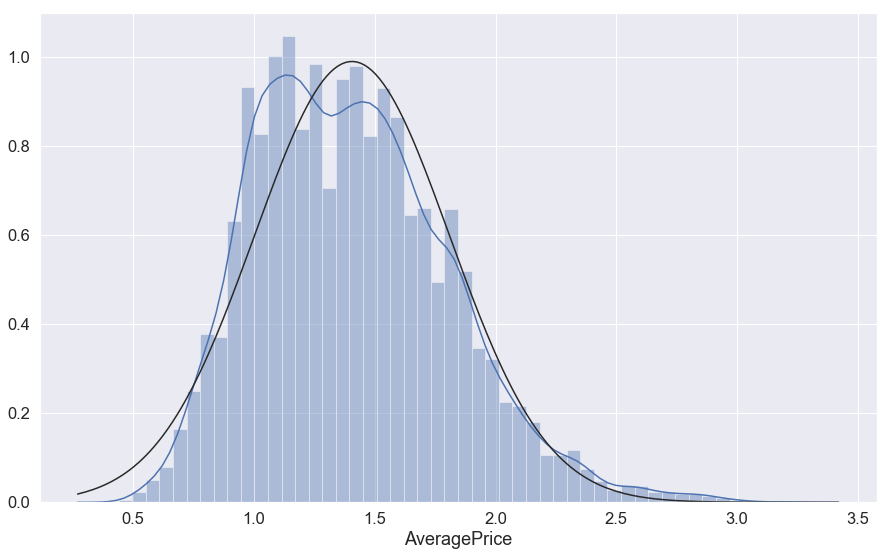

In [18]:
# disstplot을 이용하여 아보카도 평균가격 시각화
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_avo.AveragePrice, kde=True, fit=norm) # 여기서, kde를 True(참)으로 하면 커널 밀도 추정치 그래프가 입력된다. 

# 커널 밀도 추정에 관한 내용은 위에 참고할 것 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning:

invalid value encountered in sqrt



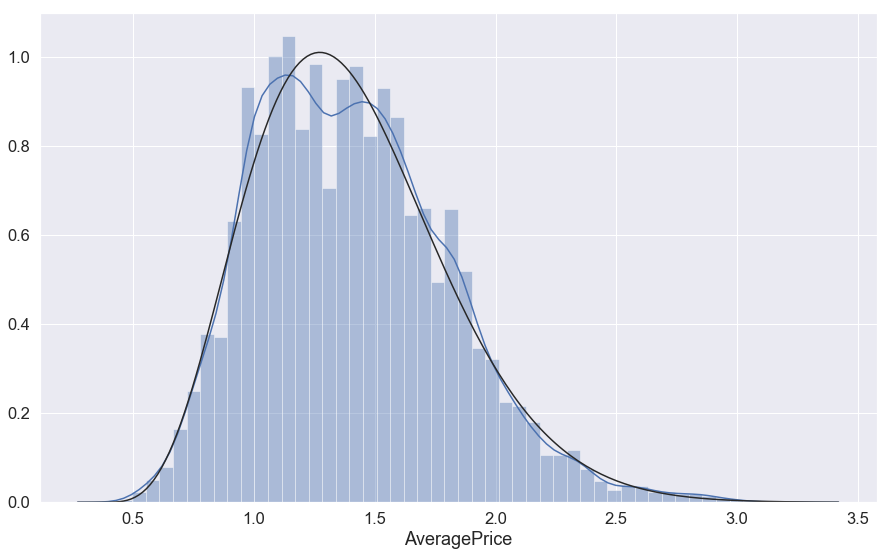

In [19]:
# beta 그래프 
sns.set(font_scale=1.5) 
from scipy.stats import beta
fig, ax = plt.subplots(figsize=(15, 9))
#sns.distplot(a=df_avo.AveragePrice, kde=True, fit=beta)

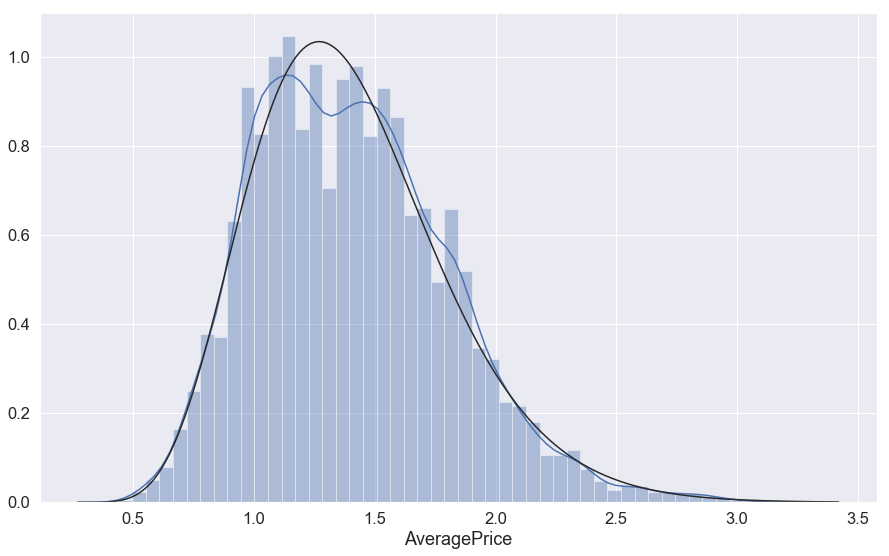

In [20]:
# 감마 그래프 
sns.set(font_scale=1.5) 
from scipy.stats import gamma
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_avo.AveragePrice, kde=True, fit=gamma)

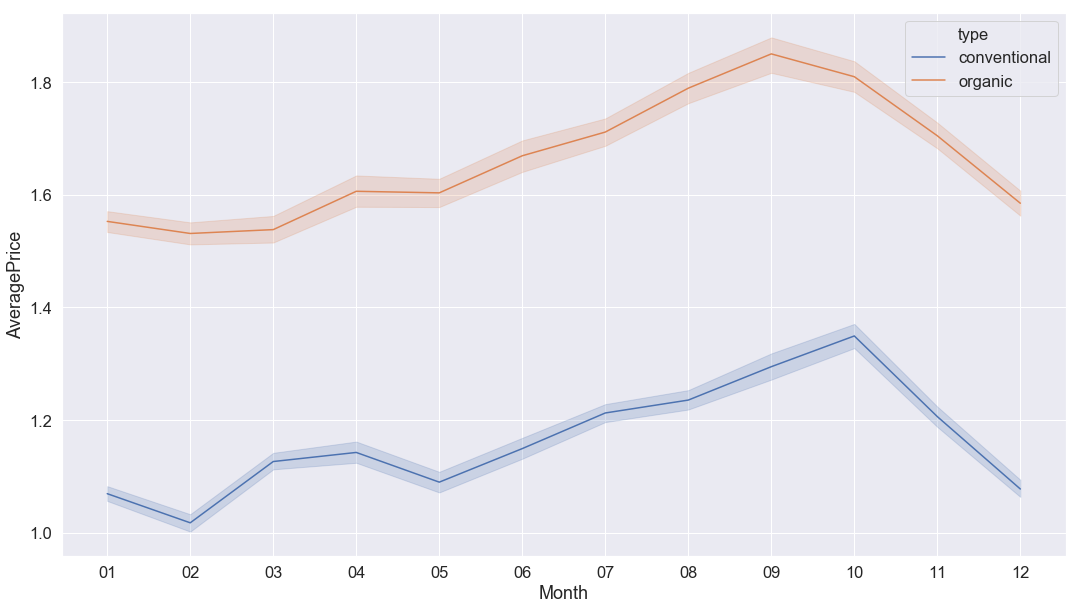

In [22]:
# 월별 평균가격 비교하기

plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df_avo)
plt.show()

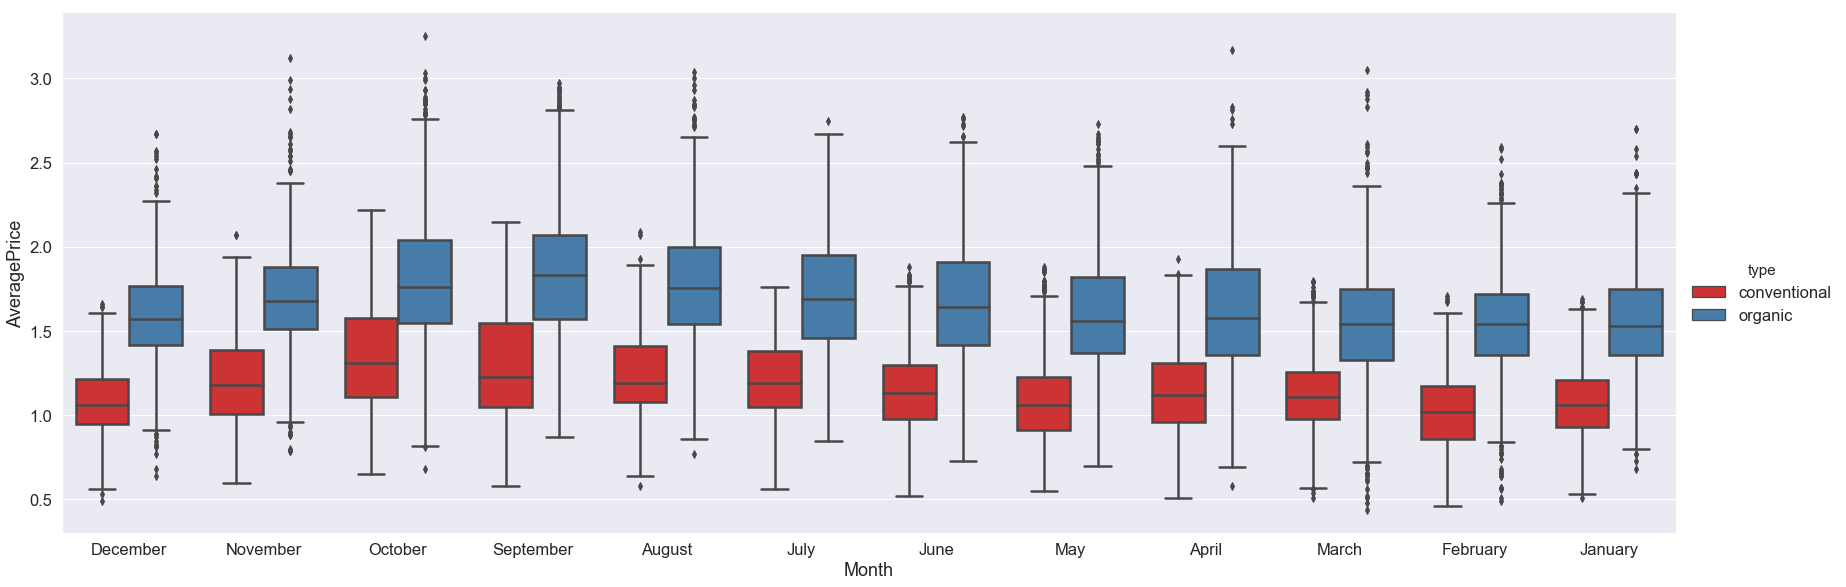

In [24]:
# 월별을 각각 영어로 바꿔서 저장함
df_avo['Month'] = df_avo['Month'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'})

#  catplot을 이용하여 그래프 시각화, palette는 색깔 
ax = sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df_avo, height=8.5, linewidth=2.5, aspect=2.8,palette="Set1");

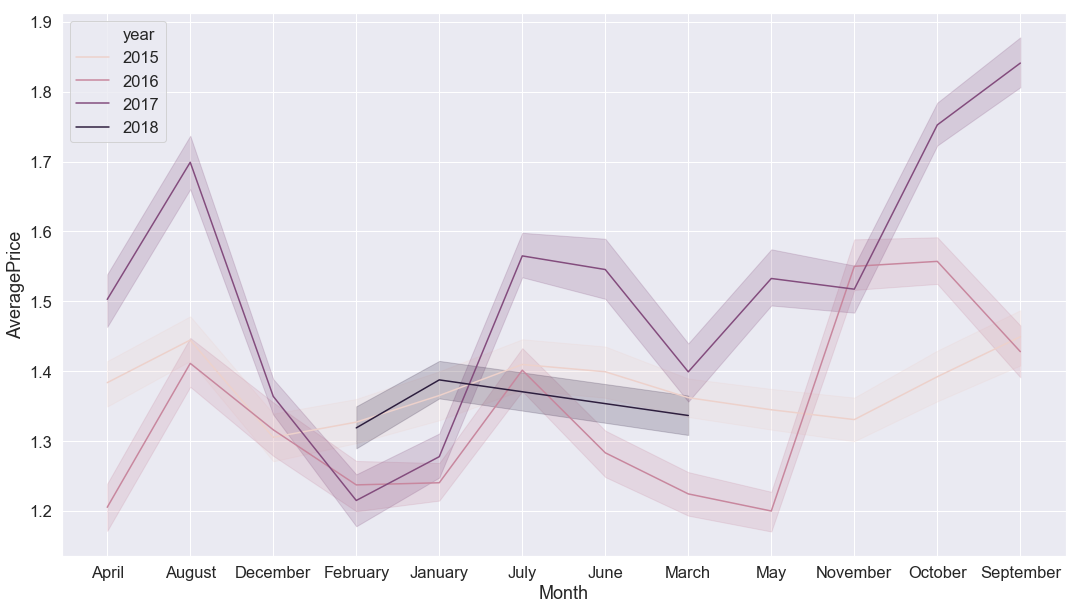

In [25]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='year',  data=df_avo)
plt.show()

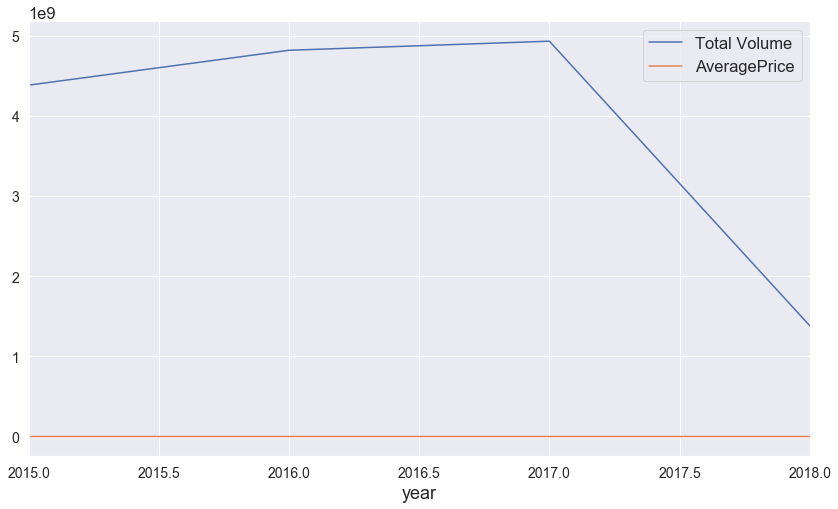

In [27]:
# 전체 판매량과 평균가격을 비교하기 위해 시각화

Year = df_avo[['Total Volume' ,'AveragePrice']].groupby(df_avo.year).sum()
Year.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

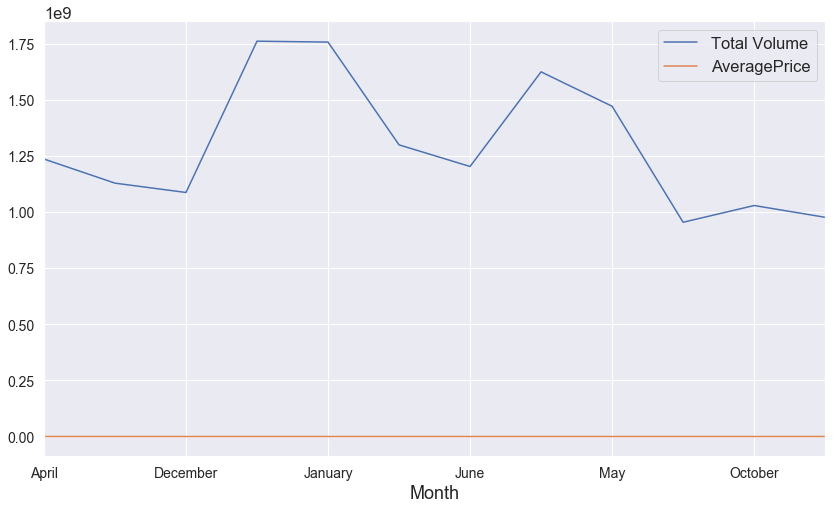

In [28]:
Month = df_avo[['Total Volume' ,'AveragePrice']].groupby(df_avo.Month).sum()
Month.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

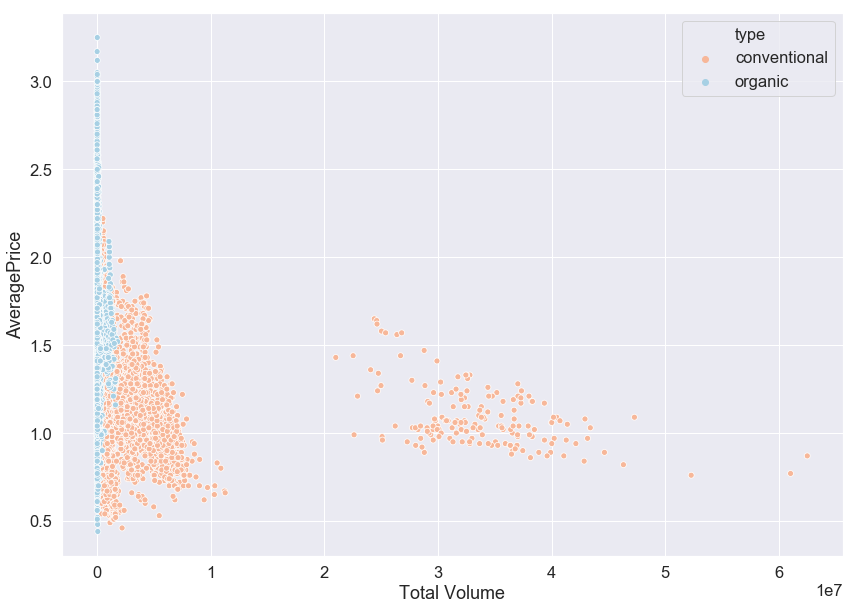

In [31]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= df_avo, palette = "RdBu")

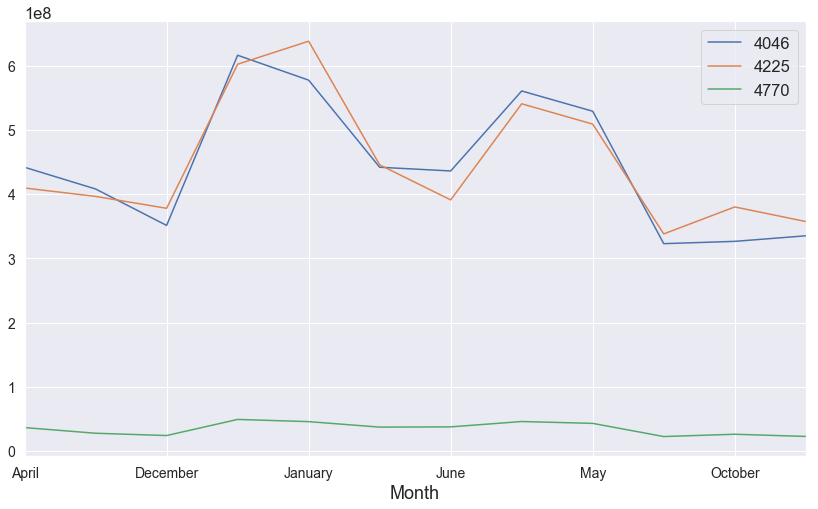

In [32]:

variant = df_avo[['4046', '4225', '4770']].groupby(df_avo.Month).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))

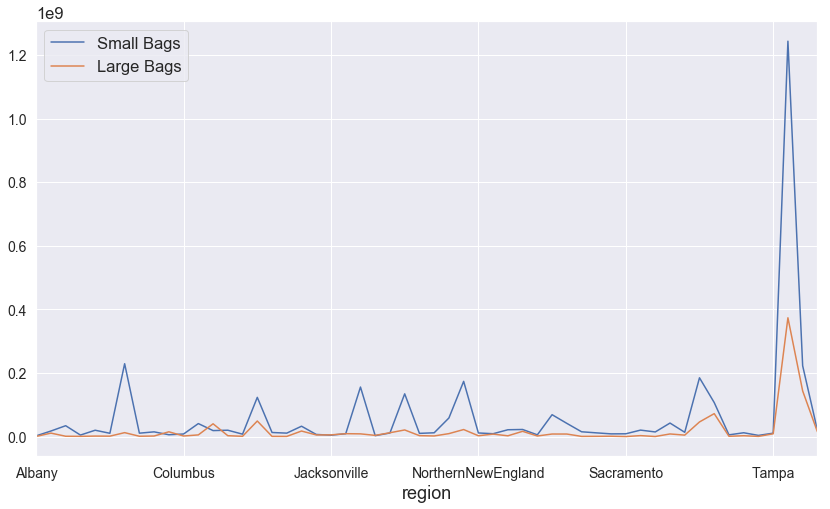

In [33]:
Bags = df_avo[['Small Bags', 'Large Bags']].groupby(df_avo.region).sum()
Bags.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

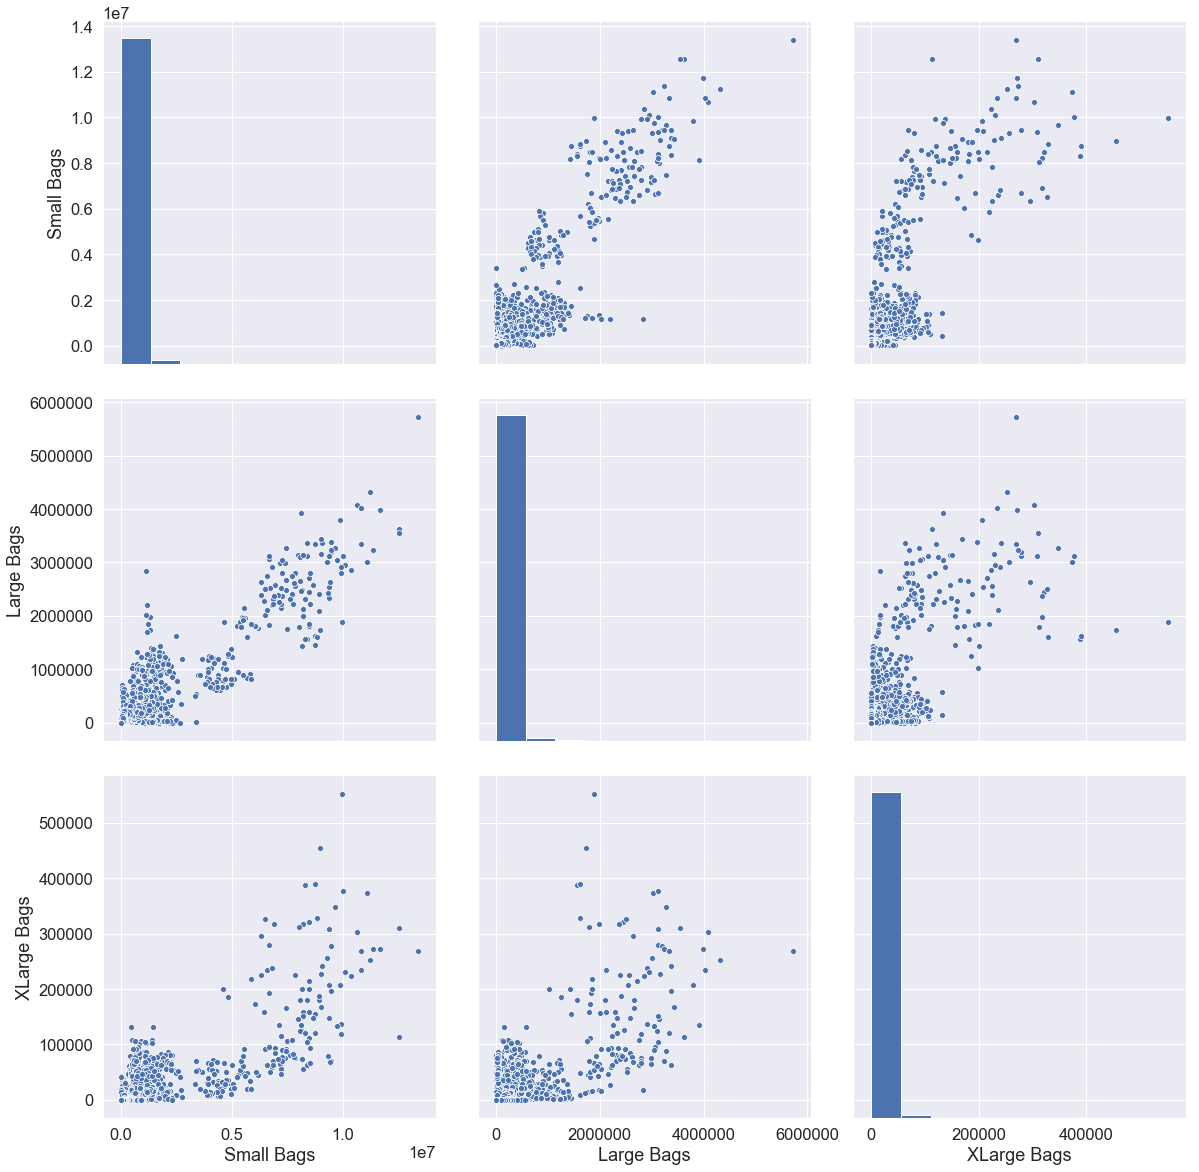

In [35]:
sns.pairplot(df_avo.iloc[:,8:11], palette="Blues_d",height=5.5)

In [39]:
df_avo.groupby(['region','year'],as_index=False)['Total Volume'].agg('mean')

,region,year,Total Volume
0,Albany,2015,3.874900e+04
1,Albany,2016,5.061861e+04
2,Albany,2017,4.935455e+04
3,Albany,2018,6.424942e+04
4,Atlanta,2015,2.233817e+05
5,Atlanta,2016,2.723738e+05
6,Atlanta,2017,2.718408e+05
7,Atlanta,2018,3.429759e+05
8,BaltimoreWashington,2015,3.908229e+05
9,BaltimoreWashington,2016,3.932096e+05


Text(0.5, 1.0, 'Average Price of Avocado According to Region')

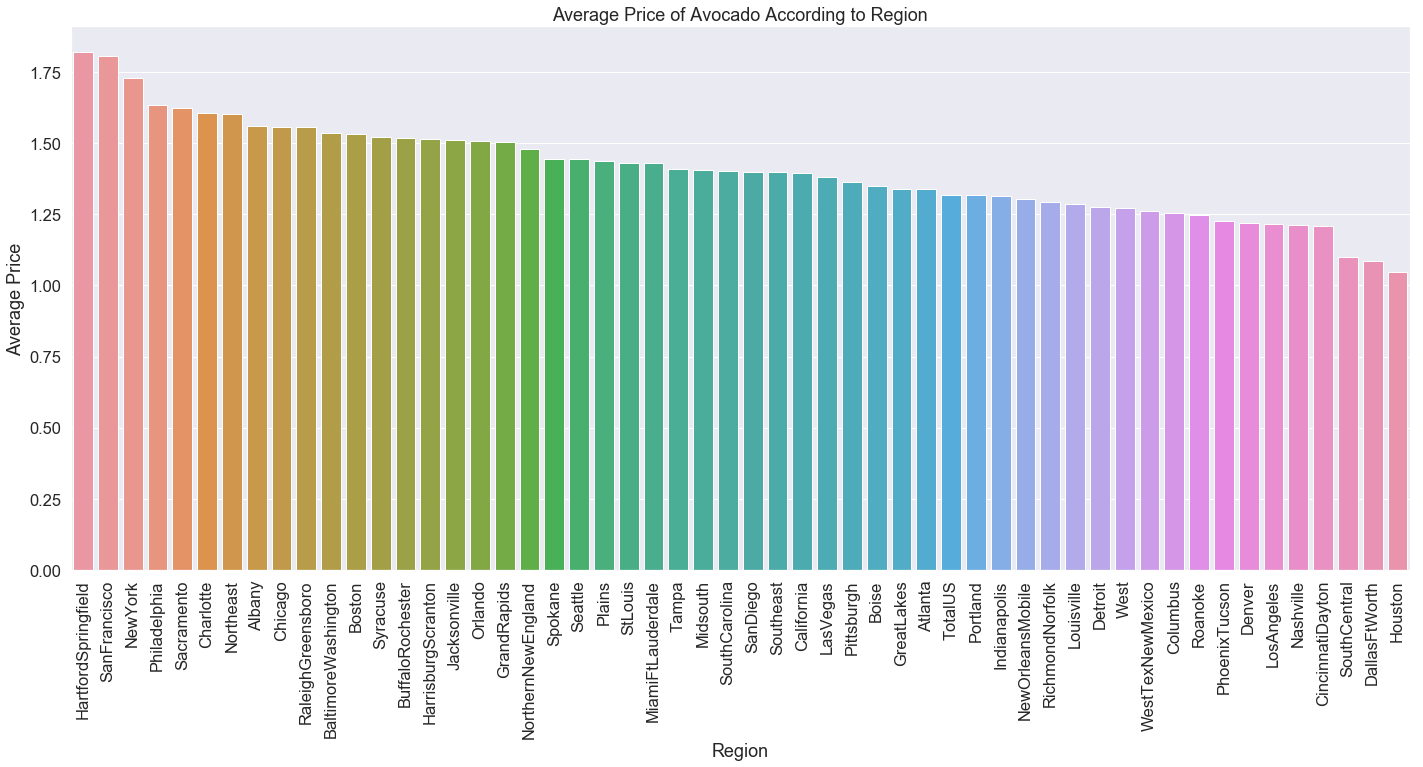

In [41]:
#  데이터 프레임에서 지역 리스트를 모아와서 새로 데이터 프레임에 지역과 평균가격을 저장함
region_list=list(df_avo.region.unique())
average_price=[]

for i in region_list:
    x=df_avo[df_avo.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

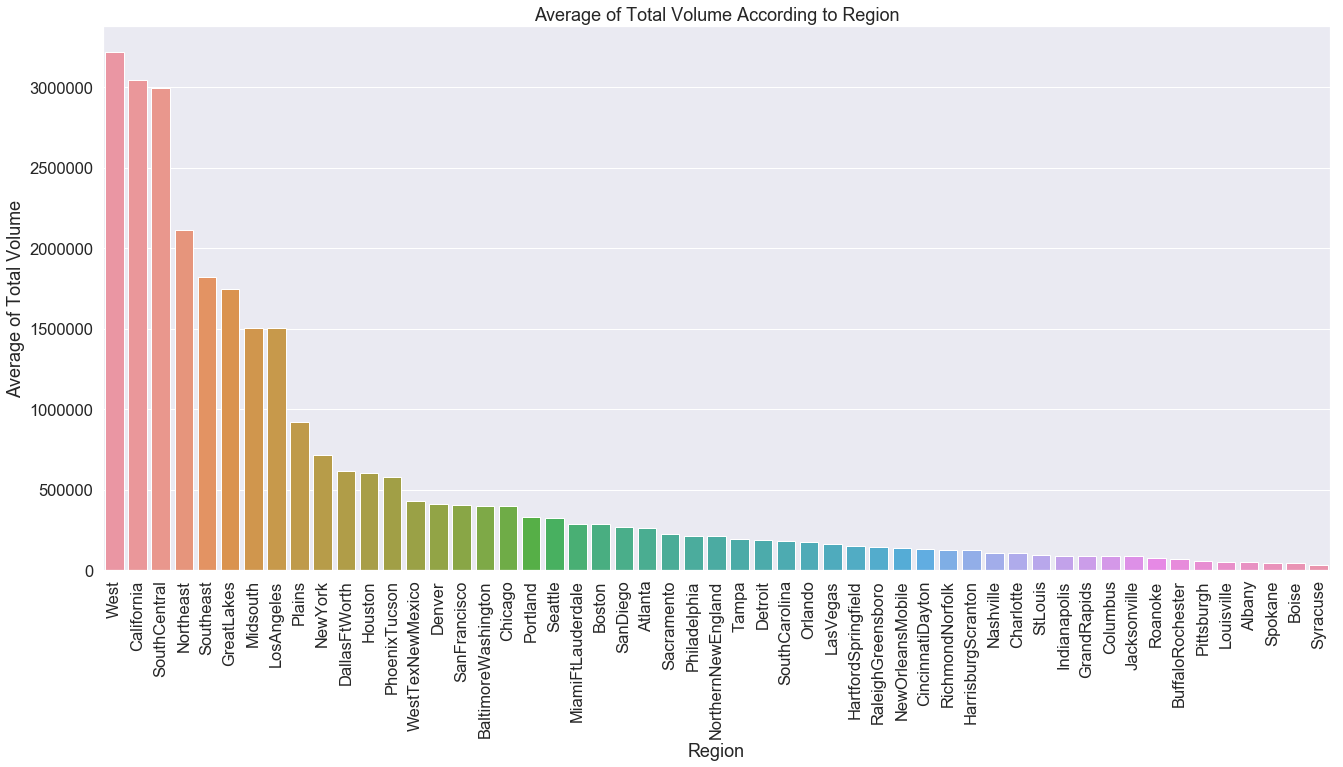

In [47]:
filter1=df_avo.region!='TotalUS'
df1=df_avo[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



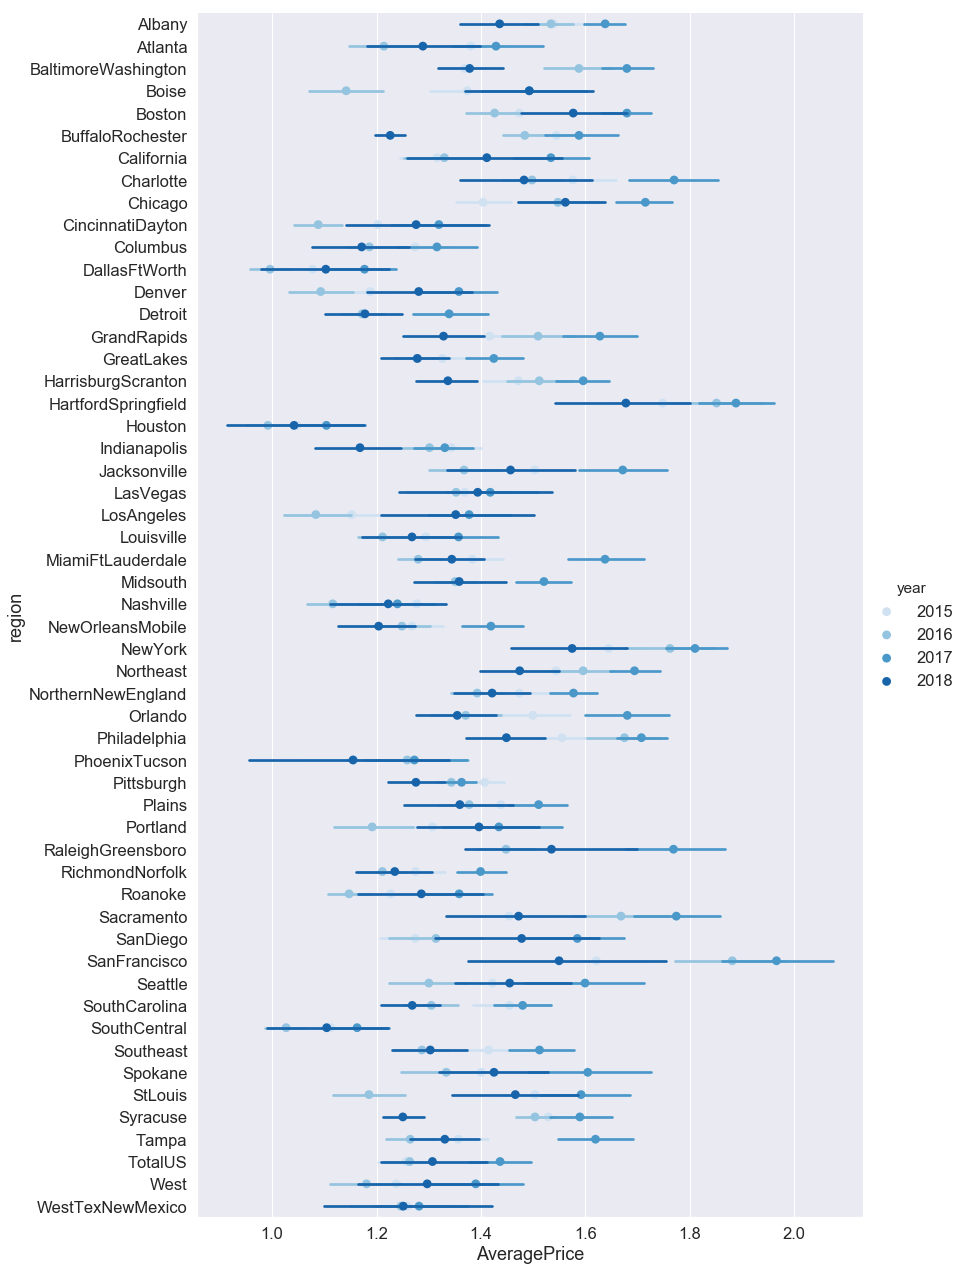

In [42]:
g = sns.factorplot('AveragePrice','region',data=df_avo,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )